# ヒューリスティックコンピューティング 第2回

## SQLを用いたデータ解析 (1/3)

## 今日の目的

- データ分析におけるSQLの基本的機能を学ぶ
- SELECT, COUNT, GROUPBY
- 日付データの取扱
- JOINは次回

## SQLとはなにか

- データベース言語
    - データベースの定義をする
    - データベースにレコードを登録、変更、削除する
    - 条件を満たすレコードを取得する
- データ分析で用いるのは「条件を満たすレコードを取得する」
- アプリケーションで用いるSQLの使い方とは大きく異なる

## データベースについて

- データベースには複数のテーブルがある
- テーブルは複数のレコードから構成されている
- レコードは複数のカラムから構成されており、これがデータである

## なぜデータ分析にSQLを使うのか？

- 現代の主流なログ解析基盤(Redshift, Bigquery, Prestoなど)はSQLをインタフェースにしている
     - 各種基盤ではSQLの定義は微妙に異なる
    - Re:dashなどSQLから直接グラフの描画ができるようなサービスも存在
- データの規模が大きいので、SQLでデータを取得し、その上で分析や、機械学習を行うようなワークフローが一般的
- データの取得、大まかな集計などが得意

## 演習について

- 某ニュースサービスの行動ログをサンプリング＆匿名化したものです
- ユーザ登録ログ、クリックログがあります
- SQLiteの形式でデータを配布し、利用します
    - SQLの文法は若干違うところがある
    - 一方で環境構築が容易なため、演習をするには最適だと考えている

## Google Colaboratoryについて

Colaboratory（略称: Colab）は、ブラウザから Python を記述、実行できるサービスです。次の特長を備えています。

- 環境構築が不要
- GPU への無料アクセス
- 簡単に共有

(ref: https://colab.research.google.com/notebooks/welcome.ipynb?hl=ja)


## Colabを始める

1. https://colab.research.google.com/?hl=ja　へアクセス
2. ノートブックを新規作成　をクリック
3. ノートブックが開く -> ファイル名をとりあえず変えておこう
   - hc21-02とかでいいよ
4. 適当にPythonのコードを入力してみよう
   - `print("Hello World")`
   - `1 + 1`


In [86]:
# driveをマウントする
# 実行後でてくるリンクをクリックし、底に出てくるコードを、フォームに入力する
# GUIでもできるけど、コードベースでできる方法のほうが伝えやすいので、、、

# コメントアウト(`#`)を外して以下の2行を実行
# from google.colab import drive
# drive.mount('/content/drive')

# コメントアウトされているのは、このファイルを作るためにローカル実行する必要があるので

- マウントすると `/content/drive/MyDrive`　でGoogleDriveのマイドライブにアクセスできる
- `hc21resources` というフォルダを作成し、配布した `sample.db` を置く
    - フォルダ名、ファイル名は自由
    - 講義ではこの設定の前提なので、自信がない人はこうしてくれると楽
    - 日本語はやめたほうが無難だと思う

In [87]:
import sqlite3

import pandas

In [88]:
# データベースへ接続

# コメントアウトを外して下の一行を実行
# sqlite_conn = sqlite3.connect('/content/drive/MyDrive/hc21resources/sample.db')

# これが失敗する人はファイル名を確認しよう

# この下の行はローカルでやる人用なので講義では不要
sqlite_conn = sqlite3.connect('../resources/sample.db')
# このリポジトリにresourcesを作ってそこにファイルを置いた想定

## SQLの基本的な構成

```
SELECT
   カラム名
FROM
   テーブル名
WHERE
　　　　条件
```

In [89]:
# 全てのテーブルをリストアップ

sql = """
SELECT
    name
FROM
    sqlite_master
WHERE
    type='table'
"""

pandas.read_sql(sql, sqlite_conn)


,name
0,users
1,clicks


In [90]:
# ひとまず動かしてみる
# SQLでは肥大化しても大丈夫なので、WHEREとかをつけちゃっていいぞ
sql = """
SELECT
    *
FROM
    users
WHERE
    gender_id = 0
LIMIT 
    30
"""
pandas.read_sql(sql, sqlite_conn)

,index,user_id,gender_id,created_at
0,1,4684,0.0,2019-03-18 15:33:28
1,10,2750,0.0,2019-03-20 09:36:02
2,11,7487,0.0,2019-03-21 17:01:38
3,15,6033,0.0,2019-03-21 07:58:00
4,16,582,0.0,2019-03-18 00:27:11
5,17,9930,0.0,2019-03-18 14:28:05
6,21,2249,0.0,2019-03-18 23:53:55
7,28,6590,0.0,2019-03-20 06:16:38
8,29,8847,0.0,2019-03-24 14:51:36
9,32,4625,0.0,2019-03-18 13:57:33


In [91]:
# データの定義の確認
# テーブル名の取得
# コンソールなら .tablesでできるが、プログラミング言語経由だとひと手間いる
# https://www.sqlite.org/faq.html#q7

# 失敗する
pandas.read_sql(".tables", sqlite_conn)

DatabaseError: Execution failed on sql '.tables': near ".": syntax error

In [ ]:
# どんなテーブルがあるかをみるところ
# sqlite_master はテーブルのメタデータを保存しているテーブル
sql = """
SELECT 
    name 
FROM 
    sqlite_master
WHERE 
    type='table'
"""

pandas.read_sql(sql, sqlite_conn)

,name
0,users
1,clicks


In [ ]:
# 全部見てみる
sql = """
SELECT 
    * 
FROM 
    sqlite_master
WHERE 
    type='table'
"""

pandas.read_sql(sql, sqlite_conn)

,type,name,tbl_name,rootpage,sql
0,table,users,users,2,"CREATE TABLE ""users"" (\n""index"" INTEGER,\n ""u..."
1,table,clicks,clicks,114,"CREATE TABLE ""clicks"" (\n""index"" INTEGER,\n ""..."


In [ ]:
sql = """
SELECT 
    sql 
FROM 
    sqlite_master 
WHERE
    name='users';
"""

pandas.read_sql(sql, sqlite_conn)

,sql
0,"CREATE TABLE ""users"" (\n""index"" INTEGER,\n ""u..."


In [ ]:
print(pandas.read_sql(sql, sqlite_conn)['sql'][0])

CREATE TABLE "users" (
"index" INTEGER,
  "user_id" INTEGER,
  "gender_id" REAL,
  "created_at" TIMESTAMP
)


In [ ]:
# * ですべてのカラムを指定できる

sql = """
SELECT
    *
FROM
    users
LIMIT 
    30
"""

pandas.read_sql(sql, sqlite_conn)

,index,user_id,gender_id,created_at
0,0,6252,NaN,2019-03-20 11:08:04
1,1,4684,0.0,2019-03-18 15:33:28
2,2,1731,1.0,2019-03-22 08:08:10
3,3,4742,1.0,2019-03-22 21:41:31
4,4,4521,1.0,2019-03-18 06:04:23
5,5,6340,NaN,2019-03-21 03:27:54
6,6,576,1.0,2019-03-19 10:15:44
7,7,5202,1.0,2019-03-21 10:28:26
8,8,6363,1.0,2019-03-18 14:10:25
9,9,439,1.0,2019-03-18 01:34:28


In [ ]:
# clicksテーブルの中身をみてみよう
sql = """
SELECT
    *
FROM
    clicks
LIMIT
    30
"""

pandas.read_sql(sql, sqlite_conn)

,index,user_id,article_id,created_at
0,0,1359,19979,2019-03-18 23:06:38
1,1,1359,3386,2019-03-18 15:39:07
2,2,1359,13339,2019-03-18 15:38:36
3,3,1359,14909,2019-03-18 13:55:23
4,4,1359,14909,2019-03-25 12:28:26
5,5,1359,5191,2019-03-19 12:35:02
6,6,1359,11337,2019-03-19 12:39:55
7,7,1359,11388,2019-03-19 08:45:20
8,8,1359,24613,2019-03-19 12:38:11
9,9,1359,971,2019-03-19 08:50:31


In [ ]:
# レコードの件数を求める
# 今回は小さなデータなので、大丈夫だけど、実際には範囲を絞らないと大変なことになるよ

sql = """
SELECT
    COUNT(user_id)
FROM
    users
"""

pandas.read_sql(sql, sqlite_conn)

,COUNT(user_id)
0,10000


In [ ]:
# clicksテーブルの件数を調べてみよう
sql = """
SELECT
    COUNT(user_id)
FROM
    clicks
"""

pandas.read_sql(sql, sqlite_conn)


,COUNT(user_id)
0,169389


In [ ]:
# ユニークなユーザーIDを取り出す

sql = """
SELECT
    DISTINCT user_id
FROM
    clicks
LIMIT 30
"""

pandas.read_sql(sql, sqlite_conn)

,user_id
0,1359
1,6363
2,3916
3,459
4,983
5,918
6,1456
7,7746
8,164
9,4229


In [ ]:
# ユニークな件数を調べる
sql = """
SELECT
    COUNT(DISTINCT user_id)
FROM
    clicks
"""

pandas.read_sql(sql, sqlite_conn)

,COUNT(DISTINCT user_id)
0,6698


In [ ]:
# ユニークな記事数を調べてみよう
sql = """
SELECT
    COUNT(DISTINCT article_id)
FROM
    clicks
"""

pandas.read_sql(sql, sqlite_conn)

,COUNT(DISTINCT article_id)
0,26455


## sample.db は何のためのデータベースか予想してみる
- クリックテーブルと、ユーザーテーブルの２つがある
  - ユーザーテーブルでは、ユーザー作成日と性別が保存されている
  - クリックテーブルでは、クリックしたユーザー、それに対応する記事、その記事をクリックした日時？が保存されている

In [ ]:
# ユニークな情報がわかるので、カラムの中身をみるにのもつかえる

sql = """
SELECT
    DISTINCT gender_id
FROM
    users
"""

pandas.read_sql(sql, sqlite_conn)

,gender_id
0,NaN
1,0.0
2,1.0


In [ ]:
# GROUP BYを用いる

sql = """
SELECT
    gender_id,
    COUNT(user_id)
FROM
    users
GROUP BY
    gender_id
"""

pandas.read_sql(sql, sqlite_conn)

,gender_id,COUNT(user_id)
0,NaN,1152
1,0.0,4831
2,1.0,4017


CASEに関しては今はそんな使わないかもしれないけど、最終的な課題？の時には使うといいかなとのこと

In [ ]:
# CASE文を使った整形
# as を使ったカラム名の変更
#　性別ごとの登録ユーザ

sql = """
SELECT
    CASE 
        WHEN gender_id = 0 THEN 'male'
        WHEN gender_id = 1 THEN 'female'
        ELSE 'unknown'
    END as gender,
    COUNT(user_id) as number_of_user
FROM
    users
GROUP BY
    gender_id
"""

pandas.read_sql(sql, sqlite_conn)

,gender,number_of_user
0,unknown,1152
1,male,4831
2,female,4017


<Axes: >

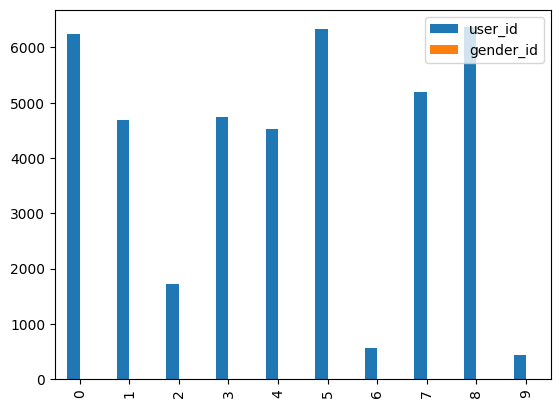

In [ ]:
pandas.read_sql(sql, sqlite_conn).plot(kind='bar')

In [ ]:
# 日付を扱う

sql = """
SELECT 
    DATE(created_at) as created_date,
    user_id,
    gender_id
FROM
    users
LIMIT 
    10 
"""

pandas.read_sql(sql, sqlite_conn)

,created_date,user_id,gender_id
0,2019-03-20,6252,NaN
1,2019-03-18,4684,0.0
2,2019-03-22,1731,1.0
3,2019-03-22,4742,1.0
4,2019-03-18,4521,1.0
5,2019-03-21,6340,NaN
6,2019-03-19,576,1.0
7,2019-03-21,5202,1.0
8,2019-03-18,6363,1.0
9,2019-03-18,439,1.0


In [ ]:
# 日付ごとの登録人数

sql = """
SELECT
    DATE(created_at) as created_date,
    COUNT(user_id) as  number_of_users
FROM
    users
GROUP BY
    DATE(created_at)
"""

pandas.read_sql(sql, sqlite_conn)

,created_date,number_of_users
0,2019-03-18,1329
1,2019-03-19,1531
2,2019-03-20,1519
3,2019-03-21,1674
4,2019-03-22,1123
5,2019-03-23,1464
6,2019-03-24,1360


<Axes: xlabel='created_date'>

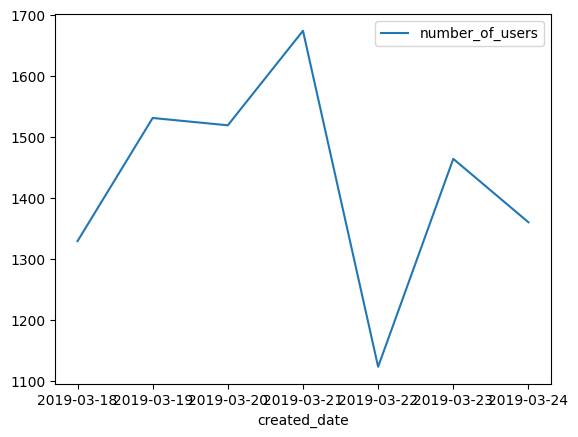

In [ ]:
pandas.read_sql(sql, sqlite_conn).plot(x='created_date')

In [ ]:
# 日付ごとのクリック数を求めよう
sql = """
SELECT
    DATE(created_at) as clicked_date,
    COUNT(user_id) as number_of_clicks
    
FROM
    clicks
GROUP BY
    DATE(created_at)
"""

pandas.read_sql(sql, sqlite_conn)

,clicked_date,number_of_clicks
0,2019-03-18,3454
1,2019-03-19,6262
2,2019-03-20,9137
3,2019-03-21,11920
4,2019-03-22,11629
5,2019-03-23,14161
6,2019-03-24,17004
7,2019-03-25,15822
8,2019-03-26,14808
9,2019-03-27,13456


In [ ]:
# 日付ごとのクリックしたユーザ数を求めよう
sql = """
SELECT
    DATE(created_at) as clicked_date,
    COUNT(DISTINCT user_id) as number_of_users
    
FROM
    clicks
GROUP BY
    DATE(created_at)
"""

pandas.read_sql(sql, sqlite_conn)

,clicked_date,number_of_users
0,2019-03-18,644
1,2019-03-19,1158
2,2019-03-20,1371
3,2019-03-21,1798
4,2019-03-22,1663
5,2019-03-23,2107
6,2019-03-24,2295
7,2019-03-25,2003
8,2019-03-26,1737
9,2019-03-27,1724


In [ ]:
# 日付ごとのクリックされた記事数を求めよう
sql = """
SELECT
    DATE(created_at) as clicked_date,
    COUNT(DISTINCT article_id) as number_of_articles
    
FROM
    clicks
GROUP BY
    DATE(created_at)
"""

pandas.read_sql(sql, sqlite_conn)

,clicked_date,number_of_articles
0,2019-03-18,1226
1,2019-03-19,1694
2,2019-03-20,2118
3,2019-03-21,2354
4,2019-03-22,2451
5,2019-03-23,2661
6,2019-03-24,3015
7,2019-03-25,2616
8,2019-03-26,2707
9,2019-03-27,2511


In [ ]:
# 日付ごとの性別ごとの登録人数を求めよう
# GROUP BYは２重にかけれます
sql = """
SELECT
    DATE(created_at) as created_date,
    CASE
        WHEN gender_id = 0 THEN 'male'
        WHEN gender_id = 1 THEN 'female'
        ELSE 'unknown'
    END as gender,
    COUNT(user_id) as number_of_users
FROM
    users
GROUP BY
    DATE(created_at),
    gender_id
"""

pandas.read_sql(sql, sqlite_conn)


,created_date,gender,number_of_users
0,2019-03-18,unknown,155
1,2019-03-18,male,673
2,2019-03-18,female,501
3,2019-03-19,unknown,159
4,2019-03-19,male,708
5,2019-03-19,female,664
6,2019-03-20,unknown,160
7,2019-03-20,male,698
8,2019-03-20,female,661
9,2019-03-21,unknown,182


↑とりあえずここまで終わった(10/08)

In [ ]:
# 日付の扱い方、
# strftimeで日付型を文字型に変換
# %Y -> 年
# %w  曜日: 0-6 (日曜日が0、土曜日が6)
# %H  時: 00-24
# %M  分: 00-59
# %S  秒: 00-59

sql = """
SELECT
    STRFTIME("%Y-%m-%d", created_at) as created_date
FROM
    users
LIMIT 10
"""

pandas.read_sql(sql, sqlite_conn)

,created_date
0,2019-03-20
1,2019-03-18
2,2019-03-22
3,2019-03-22
4,2019-03-18
5,2019-03-21
6,2019-03-19
7,2019-03-21
8,2019-03-18
9,2019-03-18


In [ ]:
# 2019年03月２０日という形で表示するには？

In [ ]:
# クリック数を曜日別で集計してみよう

In [ ]:
# 登録人数、クリック数を時間（0-23)別で集計してみよう